# IMDb Exploratory Data Analysis

## 1. Setup & Data Loading:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load datasets
basics = pd.read_csv("../data/processed/imdb_basics_clean.csv")
ratings = pd.read_csv("../data/processed/imdb_ratings_clean.csv")

## 2. Initial Data Overview

In [2]:
ratings.head()
ratings.info()
ratings.describe()

<class 'pandas.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  str    
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), str(1)
memory usage: 1.7 MB


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [3]:
basics.info()
basics.head()

<class 'pandas.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  str    
 1   primary_title    146143 non-null  str    
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  str    
 5   title_clean      146144 non-null  str    
dtypes: float64(1), int64(1), str(4)
memory usage: 6.7 MB


,movie_id,primary_title,start_year,runtime_minutes,genres,title_clean
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",one day before the rainy season
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,the other side of the wind
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabse bada sukh
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",the wandering soap opera


## 3. Merge data sets

In [4]:
# Merge datasets on 'movie_id'
df = pd.merge(basics, ratings,on='movie_id')
df.head()

,movie_id,primary_title,start_year,runtime_minutes,genres,title_clean,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",one day before the rainy season,7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,the other side of the wind,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabse bada sukh,6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",the wandering soap opera,6.5,119


## 4. Columns check

In [5]:
print(df.columns.tolist())
# Clean column names
df = df.rename(columns={
    'numvotes': 'num_votes',
    'averagerating': 'average_ratings',
    'start_year': 'release_year'
     
})
df

['movie_id', 'primary_title', 'start_year', 'runtime_minutes', 'genres', 'title_clean', 'averagerating', 'numvotes']


,movie_id,primary_title,release_year,runtime_minutes,genres,title_clean,average_ratings,num_votes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",one day before the rainy season,7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,the other side of the wind,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabse bada sukh,6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",the wandering soap opera,6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,diabolik sono io,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",sokagin çocuklari,8.7,136
73853,tt9914642,Albatross,2017,NaN,Documentary,albatross,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,la vida sense la sara amat,6.6,5


# 4. Univariate analysis
### 4.1 Ratings Distribution
Understanding how movie ratings are spread across the dataset

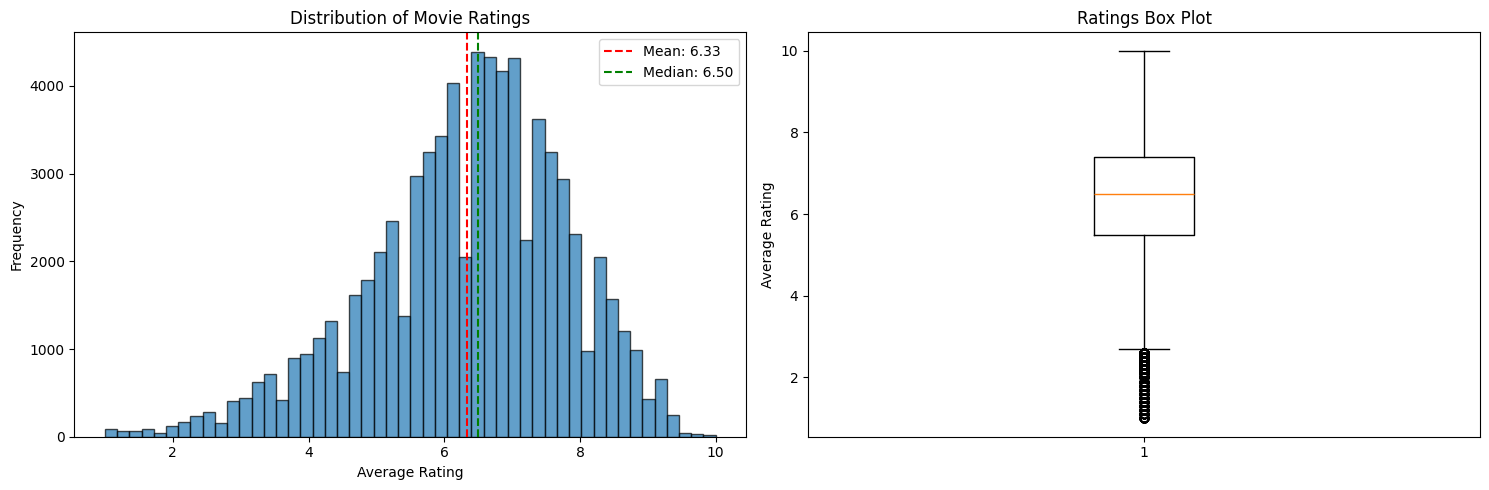

Rating Statistics:
Mean: 6.33
Median: 6.50
Std Dev: 1.47
Skewness: -0.55


In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Histogram
axes[0].hist(df['average_ratings'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['average_ratings'].mean(), color='red', linestyle='--', label=f'Mean: {df["average_ratings"].mean():.2f}')
axes[0].axvline(df['average_ratings'].median(), color='green', linestyle='--', label=f'Median: {df["average_ratings"].median():.2f}')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Movie Ratings')
axes[0].legend()

# Box plot
axes[1].boxplot(df['average_ratings'].dropna(), vert=True)
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Ratings Box Plot')

plt.tight_layout()
plt.show()

print(f"Rating Statistics:")
print(f"Mean: {df['average_ratings'].mean():.2f}")
print(f"Median: {df['average_ratings'].median():.2f}")
print(f"Std Dev: {df['average_ratings'].std():.2f}")
print(f"Skewness: {df['average_ratings'].skew():.2f}")

### 4.2 Votes Distribution
Examining audience engagement patterns

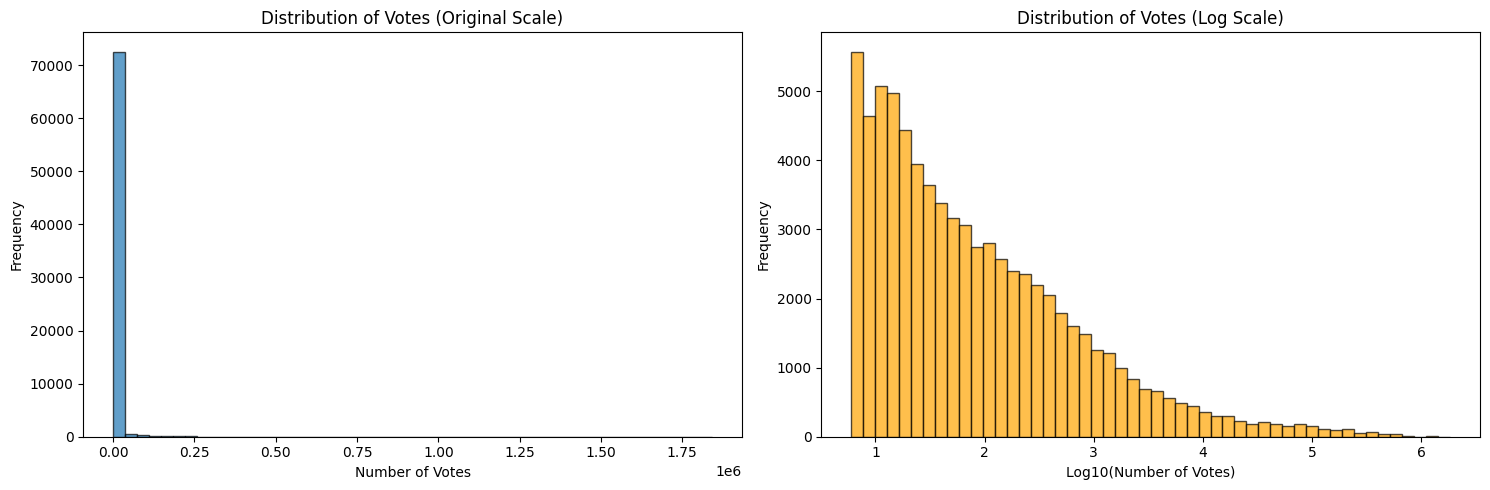

Vote Statistics:
Mean: 3,524
Median: 49
Max: 1,841,066
75th percentile: 282


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original scale
axes[0].hist(df['num_votes'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Votes')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Votes (Original Scale)')

# Log scale for better visibility
axes[1].hist(np.log10(df['num_votes'].dropna() + 1), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log10(Number of Votes)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Votes (Log Scale)')

plt.tight_layout()
#plt.savefig('../visuals/distibution_of_votes.png')
plt.show()

print(f"Vote Statistics:")
print(f"Mean: {df['num_votes'].mean():,.0f}")
print(f"Median: {df['num_votes'].median():,.0f}")
print(f"Max: {df['num_votes'].max():,.0f}")
print(f"75th percentile: {df['num_votes'].quantile(0.75):,.0f}")

### 4.3 Genre Analysis
Preparing genre data for analysis

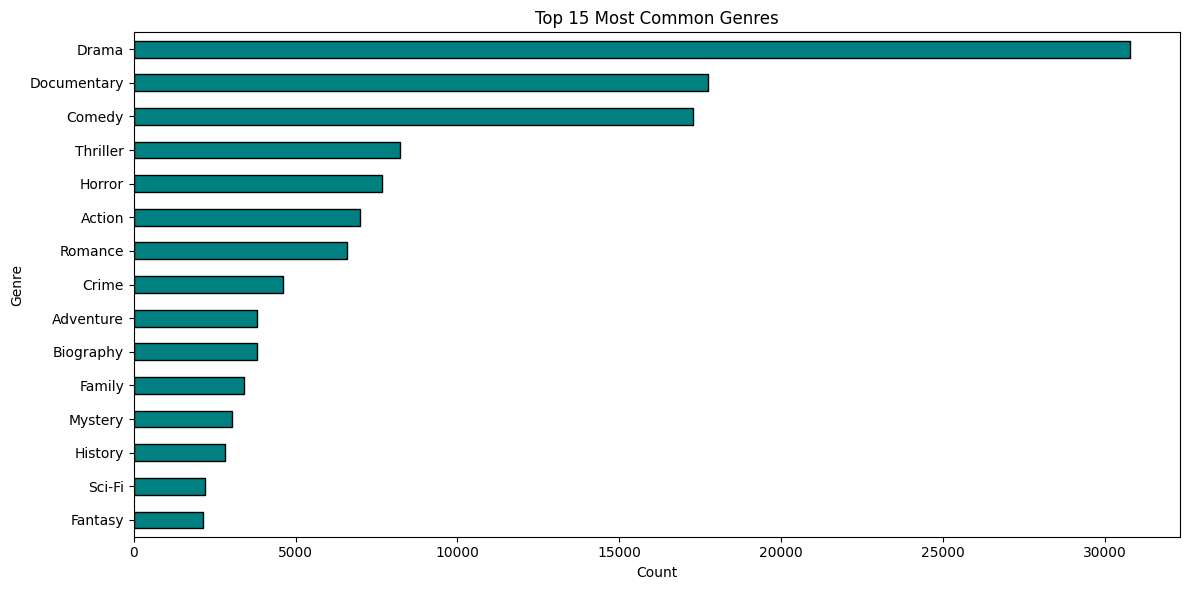

Total unique genres: 26


In [15]:

# Extract and count individual genres
all_genres = []
for genres in df['genres'].dropna():
    if isinstance(genres, str):
        all_genres.extend([g.strip() for g in genres.split(',')])

genre_counts = pd.Series(all_genres).value_counts().head(15)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='barh', color='teal', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title('Top 15 Most Common Genres')
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.savefig('../visuals/top_15_genres.png')
plt.show()

print(f"Total unique genres: {len(pd.Series(all_genres).unique())}")

# 5. Bivariate Analysis
### 5.1 Ratings by Genre
 5.1.1 Comparing average ratings across different genres

In [16]:
df['genre_list'] = df['genres'].str.split(', ')
df_exploded = df.explode('genre_list')

# Calculate genre statistics

genre_stats = df_exploded.groupby('genre_list').agg({
    'average_ratings': ['mean', 'median', 'std', 'count'],
    'num_votes': 'mean'
}).round(2)

genre_stats.columns = ['_'.join(col).strip() for col in genre_stats.columns.values]
genre_stats = genre_stats.sort_values('average_ratings_mean', ascending=False)

# Filter genres with at least 20 movies
genre_stats_filtered = genre_stats[genre_stats['average_ratings_count'] >= 20]

print("Top 15 Genres by Average Rating (min 20 movies):")
print(genre_stats_filtered.head(15))

Top 15 Genres by Average Rating (min 20 movies):
                              average_ratings_mean  average_ratings_median  \
genre_list                                                                   
Documentary,Family,Music                      7.69                    7.80   
Music                                         7.62                    8.00   
Documentary,Drama,War                         7.61                    7.40   
Action,Documentary,Drama                      7.60                    7.60   
Adventure,Documentary,Sport                   7.60                    7.60   
Adventure,Documentary,Family                  7.60                    7.60   
Documentary,Drama,Sport                       7.60                    7.50   
Biography,Documentary,Music                   7.57                    7.60   
Adventure,Documentary                         7.57                    7.60   
Action,Biography,Documentary                  7.56                    7.25   
Documentary,His